In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#reading data
df=pd.read_csv("data.csv")

In [6]:
df.head()

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      31527 non-null  int64  
 1   year            31512 non-null  object 
 2   month           31521 non-null  float64
 3   day             31507 non-null  float64
 4   hour            31519 non-null  float64
 5   PM2.5           31513 non-null  float64
 6   temperature     31508 non-null  float64
 7   pressure        31500 non-null  object 
 8   rain            31515 non-null  float64
 9   wind_direction  31467 non-null  object 
 10  wind_speed      31502 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.6+ MB


In [8]:
df.shape[0]


31527

# CHECKING FOR COUNT OF NULL VALUES

In [9]:
df.isnull().sum()

Unnamed: 0         0
year              15
month              6
day               20
hour               8
PM2.5             14
temperature       19
pressure          27
rain              12
wind_direction    60
wind_speed        25
dtype: int64

In [10]:
df.isnull().sum()/df.shape[0]*100.0

Unnamed: 0        0.000000
year              0.047578
month             0.019031
day               0.063438
hour              0.025375
PM2.5             0.044406
temperature       0.060266
pressure          0.085641
rain              0.038063
wind_direction    0.190313
wind_speed        0.079297
dtype: float64

In [11]:
df=df.drop(columns="Unnamed: 0")

In [12]:
df.shape

(31527, 10)

In [13]:
df1=df.copy()

# CLEANING -"wind_speed"

DISTPLOT FOR - "wind_speed"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


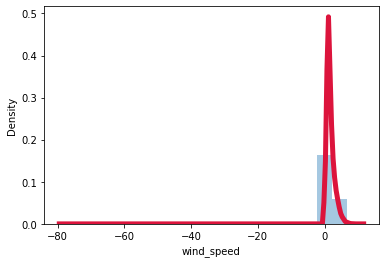

In [14]:
sns.distplot(df["wind_speed"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [15]:
df1=df1.drop(df1[df1['wind_speed'] < 0].index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


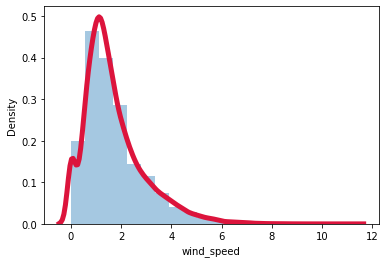

In [16]:
sns.distplot(df1["wind_speed"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [17]:
df1['wind_speed'].interpolate(method='polynomial',order=5, direction = 'both', inplace=True) 

In [18]:
df1["wind_speed"].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


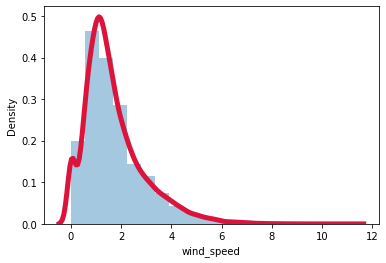

In [19]:
sns.distplot(df1["wind_speed"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

# CLEANING -"wind_direction"

FINDING THE MOST OCCURRING WIND DIRECTION

In [20]:
index = df1["wind_direction"]
index.value_counts()

NE     4464
ENE    3547
SW     3040
E      2343
NNE    2242
WSW    2054
SSW    1984
N      1893
NW     1559
ESE    1548
NNW    1360
S      1206
SE     1184
W      1095
WNW    1019
SSE     927
Name: wind_direction, dtype: int64

In [21]:
df1["wind_direction"]=df["wind_direction"].fillna("NE")

df1["wind_direction"].isnull().sum()

0

# CLEANING - "rain"

DISTPLOT FOR- "rain"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


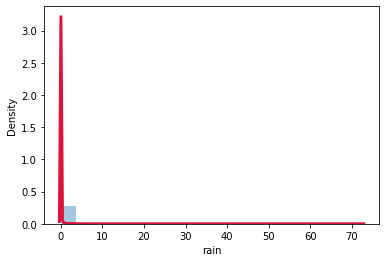

In [22]:
sns.distplot(df1["rain"], bins=20, kde_kws={'linewidth':3, 'color':'#DC143C'})

In [23]:
#df1["rain"]=df["rain"].ffill()
df1['rain'].interpolate(method='linear', direction = 'both', inplace=True) 
df1["rain"].isnull().sum()

0

# CLEANING -"pressure" 

CONVERTING OBJECT TO NUMERIC DATA TYPE

In [24]:
df1["pressure"][0]="1023.7"
df1["pressure"]=pd.to_numeric(df1["pressure"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


DISTPLOT FOR PRESSURE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


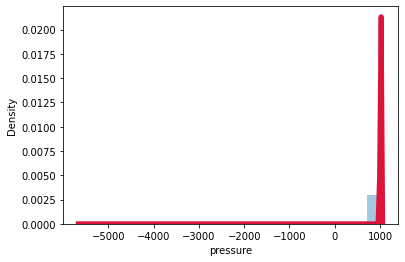

In [25]:
sns.distplot(df1["pressure"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


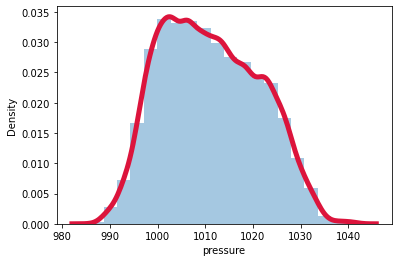

In [26]:
df1.drop(df1[df1['pressure'] < 0].index, inplace = True)
sns.distplot(df1["pressure"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


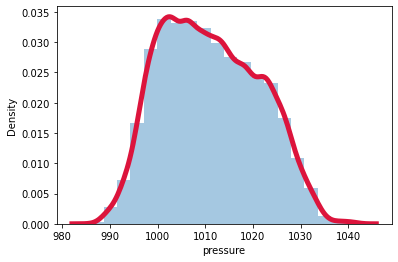

In [27]:
df1['pressure'].interpolate(method='polynomial',order=5, direction = 'both', inplace=True) 
sns.distplot(df1["pressure"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [28]:
df1["pressure"].isnull().sum()

0

# CLEANING-"temperature"

CONVERTING TEMPERATURE TO KELVIN

In [29]:
df1["temperature"]=df1["temperature"]+273
df1["temperature"].isnull().sum()

19

DISTPLOT FOR TEMPERATURE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


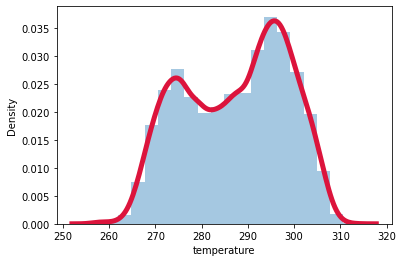

In [30]:
sns.distplot(df1["temperature"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [31]:
df1['temperature'].interpolate(method='polynomial',order=5, direction = 'both', inplace=True) 

In [32]:
df1["temperature"].isnull().sum()

0

# CLEANING-"PM2.5" 

In [33]:
df1["PM2.5"]

0         4.0
1         8.0
2         7.0
3         6.0
4         3.0
         ... 
31522    80.0
31523    75.0
31524    51.0
31525     9.0
31526     5.0
Name: PM2.5, Length: 31524, dtype: float64

In [34]:
df1["PM2.5"].isnull().sum()

14

HISTPLOT FOR -"PM2.5"

(array([31509.,     0.,     0.,     0.]),
 array([    0, 10000, 20000, 30000, 40000]),
 <a list of 4 Patch objects>)

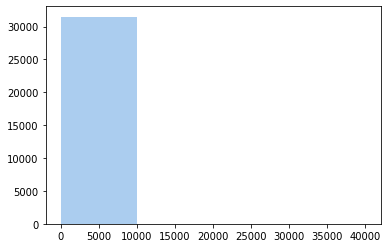

In [35]:
plt.hist(df1["PM2.5"],bins=[0,10000,20000,30000,40000],color='#abcdef')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


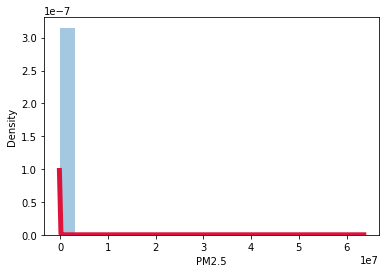

In [36]:
sns.distplot(df1["PM2.5"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})


In [37]:
df1["PM2.5"].value_counts()

9.0      538
10.0     530
13.0     513
12.0     509
11.0     504
        ... 
507.0      1
635.0      1
470.0      1
395.0      1
519.0      1
Name: PM2.5, Length: 525, dtype: int64

In [38]:
df1['PM2.5'].interpolate(method='linear', direction = 'both', inplace=True) 

# CLEANING-"hour"

In [39]:
df1["PM2.5"].isnull().sum()

0

DISTPLOT FOR-"hour"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


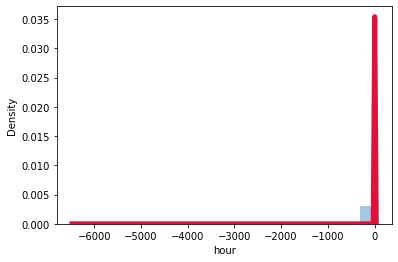

In [40]:
sns.distplot(df1["hour"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})


In [41]:
df1=df1.drop(df1[df1['hour'] < 0].index)
df1=df1.drop(df1[df1['hour'] > 23].index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


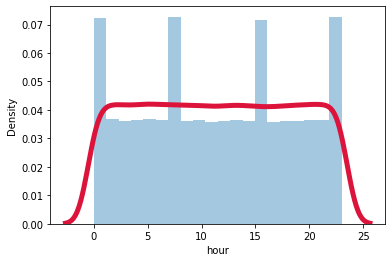

In [42]:
sns.distplot(df1["hour"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [43]:
df1['hour'].interpolate(method='linear', direction = 'both', inplace=True) 
df1.hour.isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


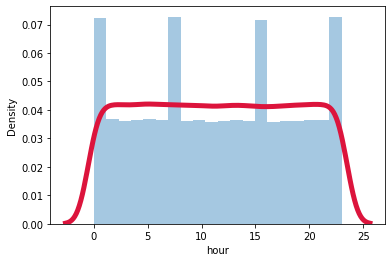

In [44]:
sns.distplot(df1["hour"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [45]:
index = df1["hour"]
index.value_counts()

5.0     1335
2.0     1333
21.0    1327
20.0    1323
23.0    1322
4.0     1319
6.0     1319
7.0     1319
8.0     1318
10.0    1316
13.0    1316
22.0    1315
0.0     1313
19.0    1313
14.0    1313
18.0    1313
3.0     1308
1.0     1307
9.0     1306
12.0    1306
17.0    1297
16.0    1296
15.0    1296
11.0    1293
Name: hour, dtype: int64

# CLEANING-"day"

In [46]:
df1['day'].isnull().sum()

20

HISTPLOT FOR -"day"

(array([31502.,     0.,     0.,     0.]),
 array([  0,  50, 100, 150, 200]),
 <a list of 4 Patch objects>)

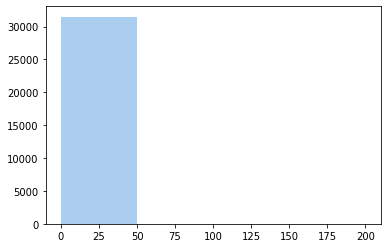

In [47]:
plt.hist(df1["day"],bins=[0,50,100,150,200],color='#abcdef')

In [48]:
df1["day"].value_counts()

 4.0       1069
 5.0       1068
 8.0       1066
 14.0      1063
 3.0       1059
 6.0       1055
 13.0      1053
 7.0       1049
 15.0      1048
 11.0      1047
 2.0       1044
 16.0      1043
 1.0       1042
 9.0       1039
 12.0      1038
 17.0      1036
 22.0      1033
 21.0      1031
 24.0      1030
 19.0      1026
 10.0      1023
 18.0      1021
 20.0      1013
 23.0      1012
 25.0      1011
 28.0      1004
 27.0       995
 26.0       985
 29.0       967
 30.0       938
 31.0       594
-5656.0       1
Name: day, dtype: int64

In [49]:
df1=df1.drop(df1[df1['day'] <0].index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


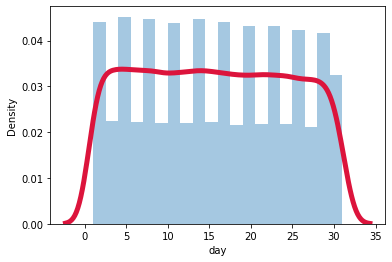

In [50]:
sns.distplot(df1["day"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [51]:
df1['day'].interpolate(method='quadratic', direction = 'both', inplace=True) 
df1.hour.isnull().sum()

0

# CLEANING FOR- "month"

In [52]:
df1['month'].isnull().sum() 

6

In [53]:
df1["month"].value_counts()

 5.0     2953
 7.0     2931
 3.0     2922
 6.0     2825
 8.0     2815
 4.0     2741
 9.0     2627
 10.0    2611
 11.0    2464
 1.0     2399
 12.0    2121
 2.0     2105
-37.0       2
Name: month, dtype: int64

In [54]:
df1=df1.drop(df1[df1['month'] <0].index)
df1

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
2,2013,3.0,1.0,2.0,7.0,271.9,1023.5,0.0,NNW,5.6
3,2013,3.0,1.0,3.0,6.0,271.6,1024.5,0.0,NW,3.1
4,2013,3.0,1.0,4.0,3.0,271.0,1025.2,0.0,N,2.0
5,2013,3.0,1.0,5.0,5.0,270.8,1025.6,0.0,N,3.7
6,2013,3.0,1.0,6.0,3.0,270.4,1026.5,0.0,NNE,2.5
...,...,...,...,...,...,...,...,...,...,...
31522,2017,2.0,27.0,6.0,80.0,272.7,1019.4,0.0,ENE,0.8
31523,2017,2.0,27.0,16.0,75.0,288.9,1014.0,0.0,SW,2.9
31524,2017,2.0,27.0,19.0,51.0,284.5,1014.1,0.0,SSW,1.0
31525,2017,2.0,28.0,2.0,9.0,281.6,1016.0,0.0,NNE,0.9


In [55]:
df1['month'].interpolate(method='polynomial',order=7, direction = 'both', inplace=True) 
df1.hour.isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


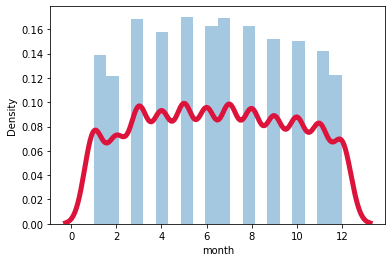

In [56]:
sns.distplot(df1["month"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

# CLEANING -"year"

In [57]:
df1.year.isnull().sum()

15

In [58]:
df1["year"].value_counts()

2015    8539
2014    8251
2013    7329
2016    7093
2017     293
Name: year, dtype: int64

CONVERTING OBJECT TO NUMERIC DATA TYPE

In [59]:
df1["year"]=pd.to_numeric(df1["year"])
df1["year"]

2        2013.0
3        2013.0
4        2013.0
5        2013.0
6        2013.0
          ...  
31522    2017.0
31523    2017.0
31524    2017.0
31525    2017.0
31526    2017.0
Name: year, Length: 31520, dtype: float64

DISTPLOT FOR -"year"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


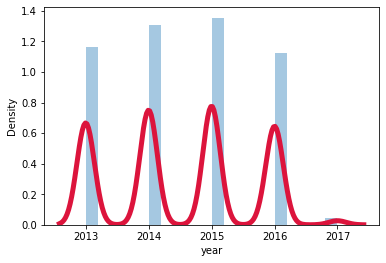

In [60]:
sns.distplot(df1["year"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [61]:
df1['year'].interpolate(method='polynomial', order=5,direction = 'both', inplace=True) 
df1.hour.isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


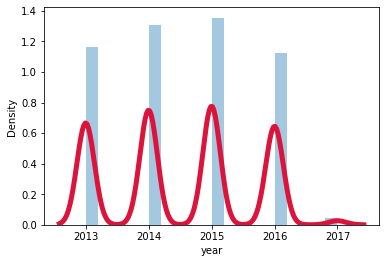

In [62]:
sns.distplot(df1["year"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

#                                         CLEANING DONE

# DATA SHAPES AFTER CLEANING

In [63]:
print("Original data shape=",df.shape)
print("Cleaned data shape=",df1.shape)

Original data shape= (31527, 10)
Cleaned data shape= (31520, 10)


In [64]:
data=df.isnull().sum()
data1=df1.isnull().sum()
print("NULL COUNT IN ORIGINAL DATA=")
print(data)
print("\nNULL COUNT IN CLEANED DATA=")
print(data1)

NULL COUNT IN ORIGINAL DATA=
year              15
month              6
day               20
hour               8
PM2.5             14
temperature       19
pressure          27
rain              12
wind_direction    60
wind_speed        25
dtype: int64

NULL COUNT IN CLEANED DATA=
year              0
month             0
day               0
hour              0
PM2.5             0
temperature       0
pressure          0
rain              0
wind_direction    0
wind_speed        0
dtype: int64


# DESCRIPTION OF CLEANED DATA

In [65]:
df1.describe()

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed
count,31520.000000,31520.000000,31520.000000,31520.000000,3.152000e+04,31520.000000,31520.000000,31520.000000,31520.000000
mean,2014.516720,6.453903,15.592506,11.494099,2.095210e+03,287.357447,1011.012986,0.071732,1.702220
std,1.105024,3.308569,8.791907,6.931708,3.574690e+05,11.297239,10.216333,0.949645,1.200755
min,2013.000000,1.000000,1.000000,0.000000,3.000000e+00,256.200000,985.900000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.000000,2.300000e+01,277.300000,1002.700000,0.000000,0.900000
50%,2015.000000,6.000000,15.000000,11.000000,5.800000e+01,288.800000,1010.300000,0.000000,1.400000
75%,2015.000000,9.000000,23.000000,18.000000,1.130000e+02,296.700000,1019.000000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,6.346466e+07,313.500000,1042.000000,72.500000,11.200000


In [66]:
df1.index = [i for i in range(1, 31521)]
df1

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
1,2013.0,3.0,1.0,2.0,7.0,271.9,1023.5,0.0,NNW,5.6
2,2013.0,3.0,1.0,3.0,6.0,271.6,1024.5,0.0,NW,3.1
3,2013.0,3.0,1.0,4.0,3.0,271.0,1025.2,0.0,N,2.0
4,2013.0,3.0,1.0,5.0,5.0,270.8,1025.6,0.0,N,3.7
5,2013.0,3.0,1.0,6.0,3.0,270.4,1026.5,0.0,NNE,2.5
...,...,...,...,...,...,...,...,...,...,...
31516,2017.0,2.0,27.0,6.0,80.0,272.7,1019.4,0.0,ENE,0.8
31517,2017.0,2.0,27.0,16.0,75.0,288.9,1014.0,0.0,SW,2.9
31518,2017.0,2.0,27.0,19.0,51.0,284.5,1014.1,0.0,SSW,1.0
31519,2017.0,2.0,28.0,2.0,9.0,281.6,1016.0,0.0,NNE,0.9


In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le=LabelEncoder()
label=le.fit_transform(df1["wind_direction"])
le.classes_

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [69]:
df3=df1.drop(columns="wind_direction")
df3["wind_direction"]=label

# df3 is cleaned data

In [70]:
df3

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,wind_direction
1,2013.0,3.0,1.0,2.0,7.0,271.9,1023.5,0.0,5.6,6
2,2013.0,3.0,1.0,3.0,6.0,271.6,1024.5,0.0,3.1,7
3,2013.0,3.0,1.0,4.0,3.0,271.0,1025.2,0.0,2.0,3
4,2013.0,3.0,1.0,5.0,5.0,270.8,1025.6,0.0,3.7,3
5,2013.0,3.0,1.0,6.0,3.0,270.4,1026.5,0.0,2.5,5
...,...,...,...,...,...,...,...,...,...,...
31516,2017.0,2.0,27.0,6.0,80.0,272.7,1019.4,0.0,0.8,1
31517,2017.0,2.0,27.0,16.0,75.0,288.9,1014.0,0.0,2.9,12
31518,2017.0,2.0,27.0,19.0,51.0,284.5,1014.1,0.0,1.0,11
31519,2017.0,2.0,28.0,2.0,9.0,281.6,1016.0,0.0,0.9,5


In [71]:
#df3.to_csv('cleaned.csv')

Next task:-

1. Find outliers and fix or remove them. Mention the methods and explain how did you find the outliers. Also, give reason that why have you removed or fixed the values of the outliers.

2. Analyse each column with every other coulmn and find the relationship between the two columns. This can be done using various plots/graphs.

3. Find the correlation of PM2.5 with rest of the coulmns using correlation matrix and then visulaize the correlation matrix using heatmap.

4. Perform various plots like:- scatter plots, lm plots, bar plots, pie plots etc according to the values in the columns. Keep in mind that you don't need to plot every type of plots, plot only the ones you think are suitable for a column.

5. Plot box plot for every column and write your observations that you observed from the box plot.

6. Find how PM2.5 is getting affected by other coulmns.

Each task has it's own value so don't miss any task. Mention the task in your code file and then do the task.

We are sorry for the delay in providing the tasks.

The deadline for the task is 16 September 12 PM.

FINDING OUTLIERS USING BOXPLOT AND REMOVING THEM USING INTER QUARTILE RANGE (IQR) METHOD.

FIRST WE PLOTTED BOXPLOT FOR EACH FEATURE.
IF ANY OUTLIERS WERE FOUND THEN THEY WERE REMOVED USING IQR METHOD

FOLLOWING STEPS WERE USED TO REMOVE OUTLIERS-
1)Calculate the interquartile range for the data.
2)Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
3)Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.

In [72]:
import warnings
warnings.filterwarnings("ignore")
df4=df3.copy()

In [73]:
df4.head()

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,wind_direction
1,2013.0,3.0,1.0,2.0,7.0,271.9,1023.5,0.0,5.6,6
2,2013.0,3.0,1.0,3.0,6.0,271.6,1024.5,0.0,3.1,7
3,2013.0,3.0,1.0,4.0,3.0,271.0,1025.2,0.0,2.0,3
4,2013.0,3.0,1.0,5.0,5.0,270.8,1025.6,0.0,3.7,3
5,2013.0,3.0,1.0,6.0,3.0,270.4,1026.5,0.0,2.5,5


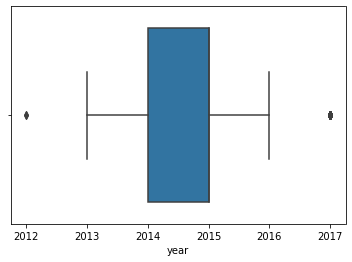

In [74]:
sns.boxplot(df4["year"].astype(int))

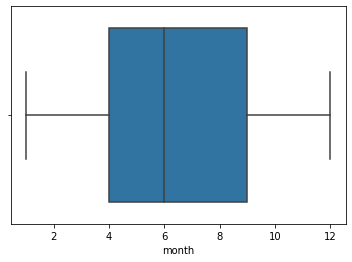

In [75]:
sns.boxplot(df4["month"])

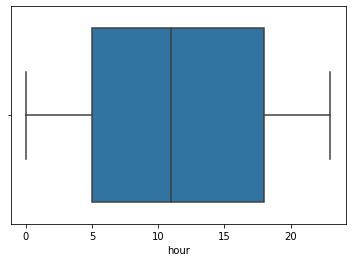

In [76]:
sns.boxplot(df4["hour"])

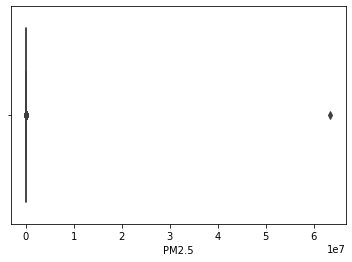

In [77]:
sns.boxplot(df4["PM2.5"])

In [78]:
percentile25 = df['PM2.5'].quantile(0.25)
percentile75 = df['PM2.5'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
##lower_limit = percentile25 - 1.5 * iqr

df4=df4.drop(df4[df4['PM2.5'] >200].index)
print(upper_limit)

248.0


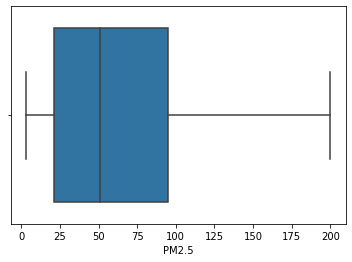

In [79]:
sns.boxplot(df4["PM2.5"])

In [80]:
df4['PM2.5'].interpolate(method='linear', direction = 'forward', inplace=True) 
df4["PM2.5"].isnull().sum()

0

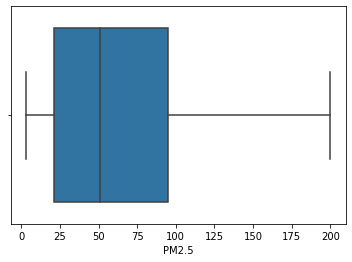

In [81]:
sns.boxplot(df4["PM2.5"])


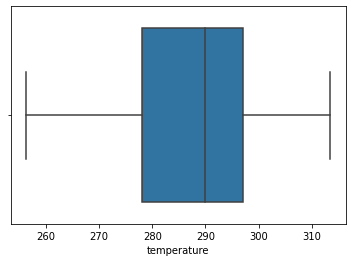

In [82]:
sns.boxplot(df4["temperature"])

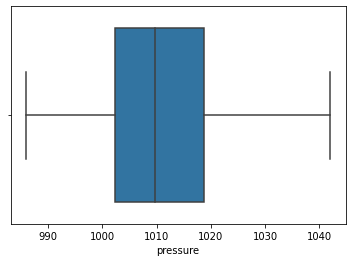

In [83]:
sns.boxplot(df4["pressure"])

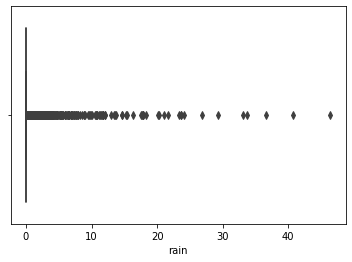

In [84]:
sns.boxplot(df4["rain"])


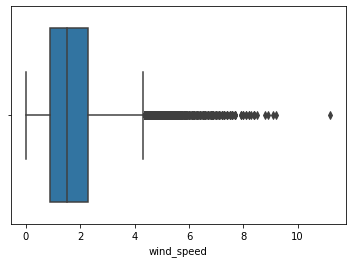

In [85]:
sns.boxplot(df4.wind_speed)

In [86]:
percentile25 = df['wind_speed'].quantile(0.25)
percentile75 = df['wind_speed'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
##lower_limit = percentile25 - 1.5 * iqr

#df4["wind_speed"].loc[df4["wind_speed"] > upper_limit,'wind_speed'] = np.nan
df4.loc[df4.wind_speed > upper_limit, 'wind_speed'] = np.nan
df4["wind_speed"].isnull().sum()

1509

In [87]:
df4['wind_speed'].fillna(df4.wind_speed.mean(),inplace=True) 


In [88]:
df4["wind_speed"].isnull().sum()

0

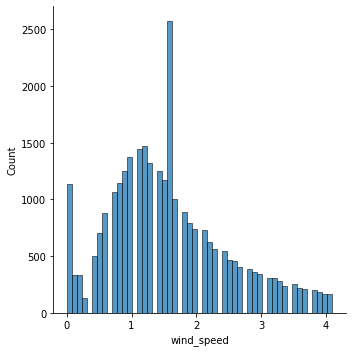

In [89]:
sns.displot(df4.wind_speed)

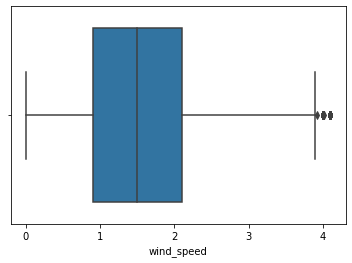

In [90]:
sns.boxplot(df4.wind_speed)

<Figure size 1800x1800 with 0 Axes>

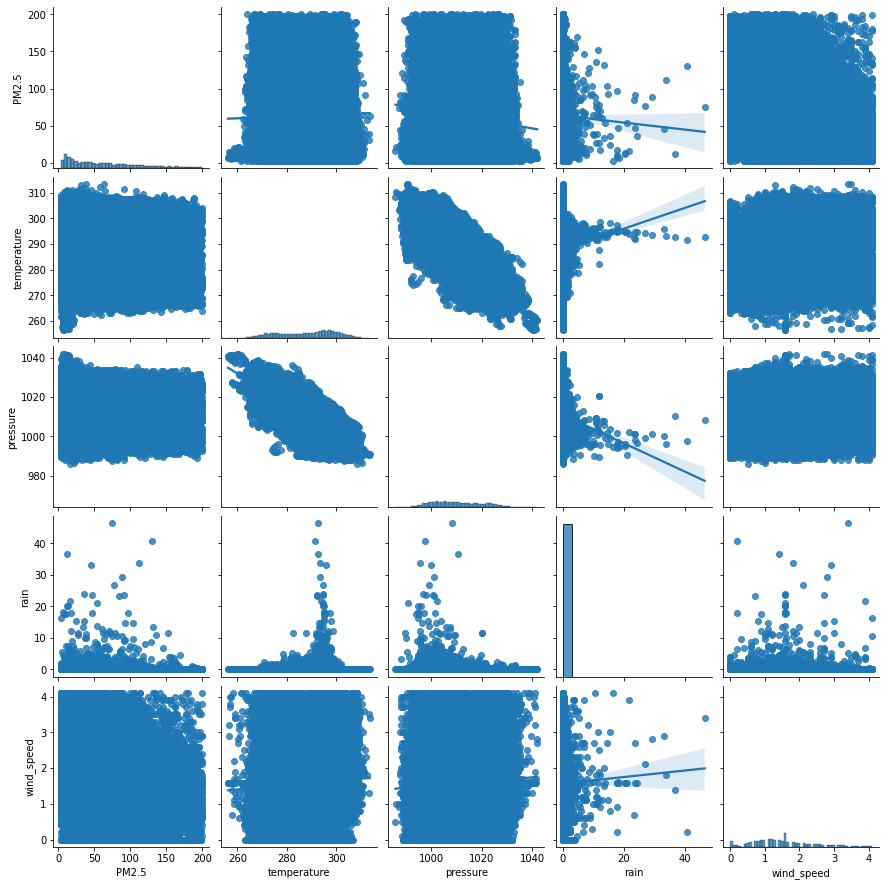

In [91]:
plt.figure(figsize=(25,25))
sns.pairplot(df4.iloc[:, 4:9], markers=["o"],kind="reg")


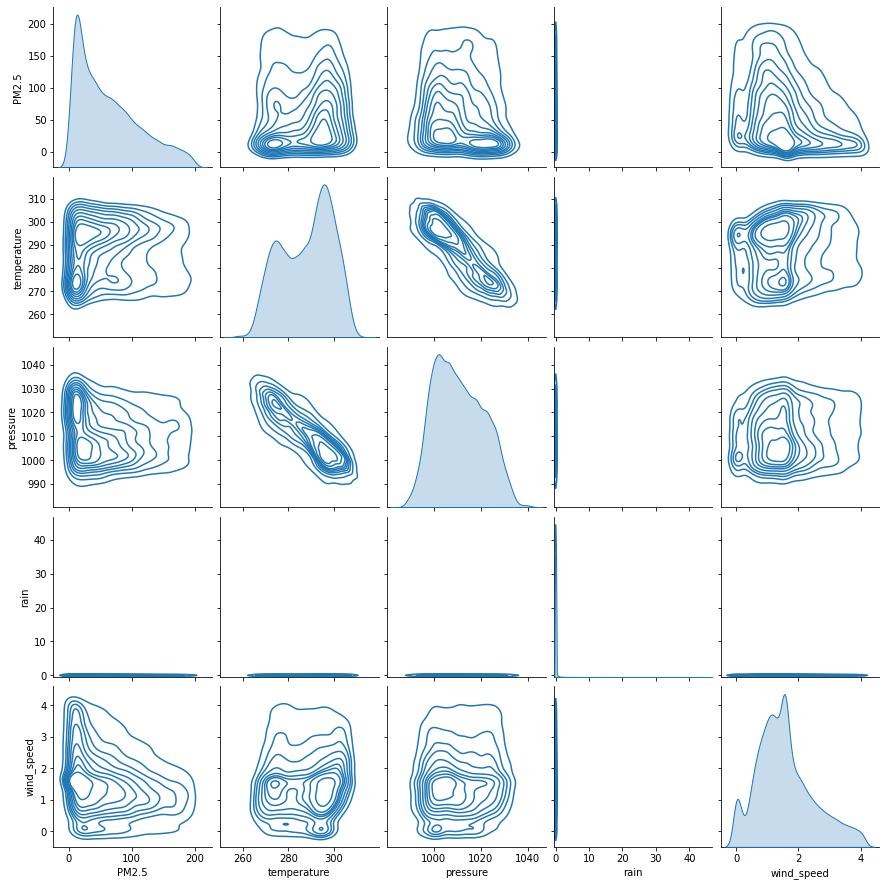

In [92]:
sns.pairplot(df4.iloc[:, 4:9], markers=["o", "s"],kind="kde")

## FROM ABOVE PAIRPLOT WE CONCLUDE THE FOLLOWING POINTS-

1)PM2.5 IS FOUND TO BE VERY LESS AT HIGH WIND SPEED.

2)AT VERY LOW TEMPERATURE AND VERY HIGH TEMPERATURE PM2.5 IS VERY LESS AND EVEN IF IT IS PRESENT THEN ITS CONCENTRATION IS VERY   LESS.

3)AS TEMPERATURE INCREASES PRESURE DECREASES IN LINEAR FASHION.


**From below heatmap we infer that -**

**1)PM2.5 does not correlate much with other features.It only correlates with "wind_speed" with a value of -0.23 which means it decreases with increase in "wind_speed".**

**2)Pressure varies inversely with temperature with a coerrelation value of -0.83.**

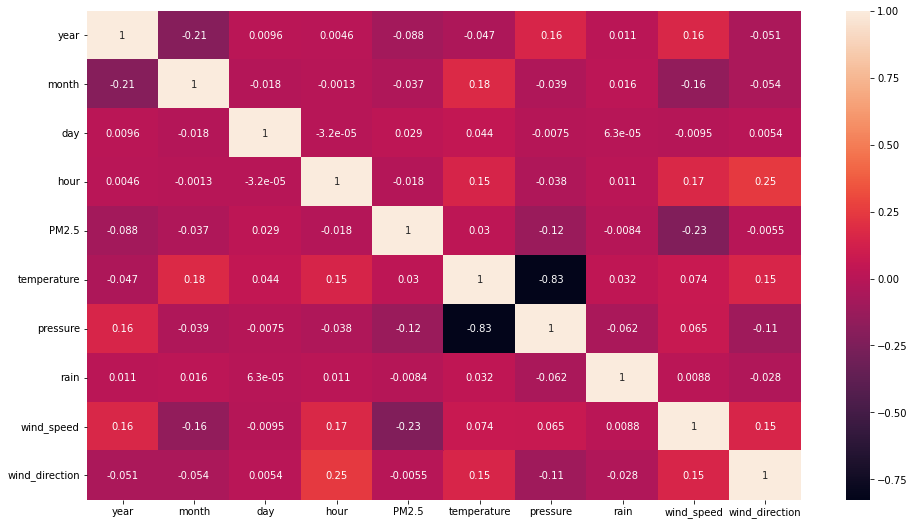

In [93]:
plt.figure(figsize=(16,9))
sns.heatmap(df4.corr(),annot=True)

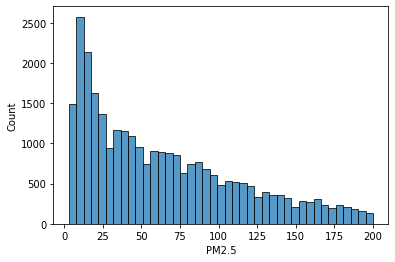

In [94]:
sns.histplot(x="PM2.5",data=df4)
plt.savefig('foo.png')

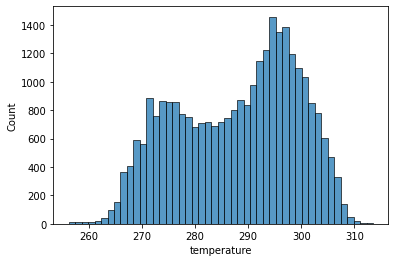

In [95]:
sns.histplot(x="temperature",data=df4)


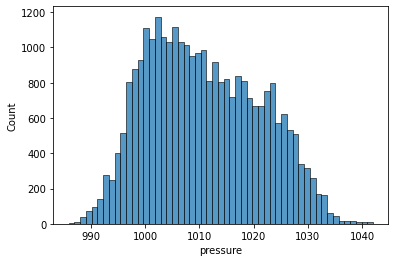

In [96]:
sns.histplot(x="pressure",data=df4)


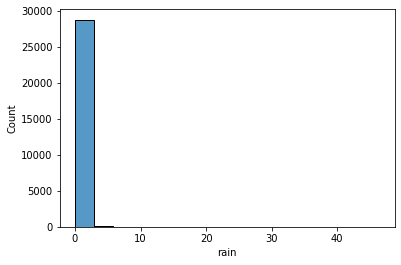

In [97]:
sns.histplot(x="rain",data=df4)


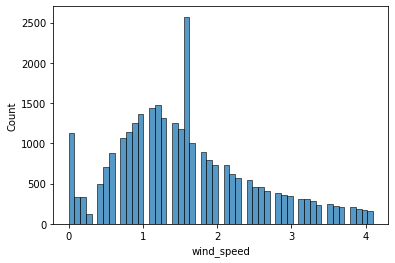

In [98]:
sns.histplot(x="wind_speed",data=df4)


# **Box Plot**
 Plot box plot for every column and write your observations that you observed from the box plot.
 
 
Boxplot captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th, 50th and 75th percentiles. These percentiles are also known as the lower quartile, median and upper quartile.

A box plot consist of 5 things.

**Minimum**

**First Quartile or 25%**

**Median (Second Quartile) or 50%**

**Third Quartile or 75%**

**Maximum**

Using boxplot we found out the range in which majority of our data for  specified columns were concentrated 

{'boxes': [<matplotlib.lines.Line2D at 0x7f2951ae5150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2951329d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f295139c1d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2951accb90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f295139e850>,
  <matplotlib.lines.Line2D at 0x7f2951a88bd0>]}

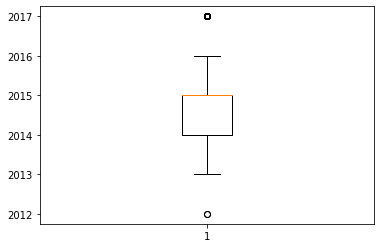

In [99]:
plt.boxplot(df4["year"].astype(int))

WE  CONCLUDE THAT MAJORITY DATA BELONGS FROM YEAR 2013 TO 2016 WITH SINGLE DATAS BELONGING TO 2012 AND 2017

{'boxes': [<matplotlib.lines.Line2D at 0x7f2951381390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2951383150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2951425610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f29514255d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f295131e2d0>,
  <matplotlib.lines.Line2D at 0x7f29513833d0>]}

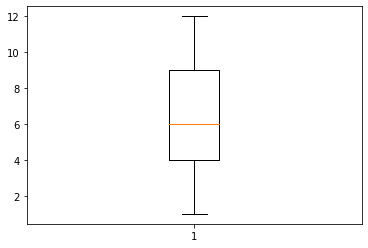

In [100]:
plt.boxplot(df4["month"].astype(int))

{'boxes': [<matplotlib.lines.Line2D at 0x7f2951034e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f29510a3a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f295102bb90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f295102bad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2951034510>,
  <matplotlib.lines.Line2D at 0x7f29510a3990>]}

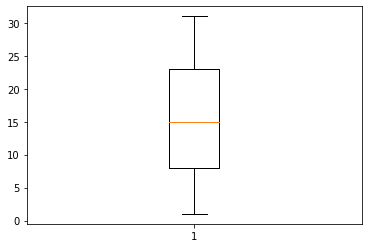

In [101]:
plt.boxplot(df4["day"].astype(int))

{'boxes': [<matplotlib.lines.Line2D at 0x7f2951417910>],
 'caps': [<matplotlib.lines.Line2D at 0x7f29513dad50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f29513c9bd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f29513c9d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f295136acd0>,
  <matplotlib.lines.Line2D at 0x7f295136ae90>]}

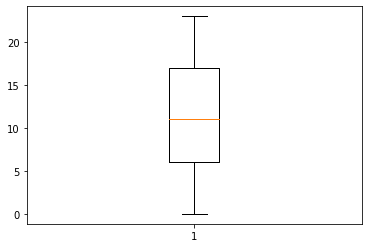

In [102]:
plt.boxplot(df4["hour"].astype(int))

{'boxes': [<matplotlib.lines.Line2D at 0x7f2950c63b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2950bebb90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2950bf2bd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2950bf2690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2950beb110>,
  <matplotlib.lines.Line2D at 0x7f2950beb650>]}

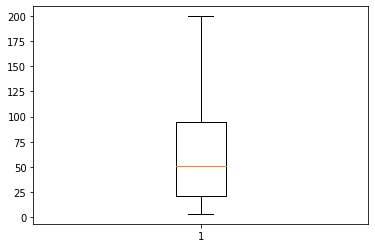

In [103]:
plt.boxplot(df4["PM2.5"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f2950bd9ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2950be1b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2950b69b90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2950b69650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2950be10d0>,
  <matplotlib.lines.Line2D at 0x7f2950be1610>]}

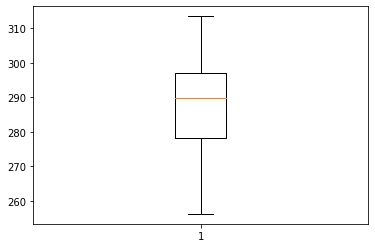

In [104]:
plt.boxplot(df4["temperature"])


{'boxes': [<matplotlib.lines.Line2D at 0x7f2950b4c550>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2950b535d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2950b5a610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2950b5a0d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2950b4cb10>,
  <matplotlib.lines.Line2D at 0x7f2950b53090>]}

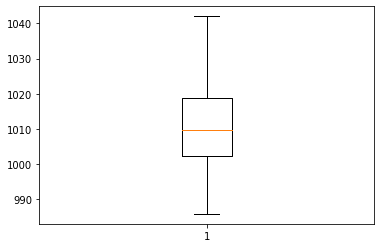

In [105]:
plt.boxplot(df4["pressure"])



{'boxes': [<matplotlib.lines.Line2D at 0x7f2950ab1f10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2950abaf90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2950ac2fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2950ac2a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2950aba510>,
  <matplotlib.lines.Line2D at 0x7f2950abaa50>]}

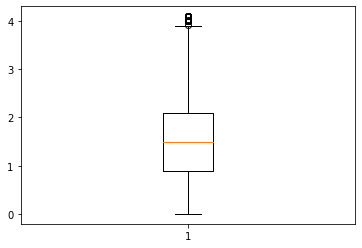

In [106]:
plt.boxplot(df4["wind_speed"])


{'boxes': [<matplotlib.lines.Line2D at 0x7f2950aa60d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2950a2d150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2950a35190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2950a2dc10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2950aa6690>,
  <matplotlib.lines.Line2D at 0x7f2950aa6bd0>]}

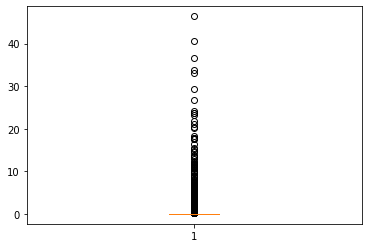

In [107]:
plt.boxplot(df4["rain"])


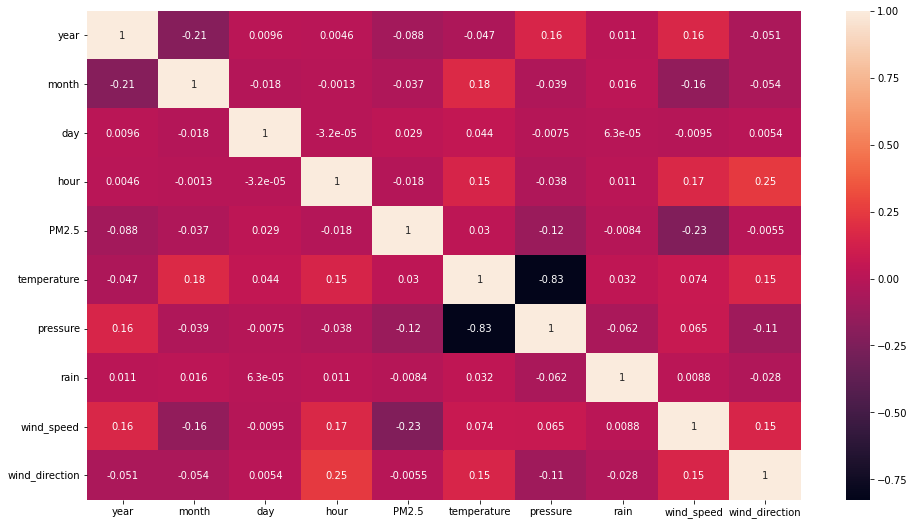

In [108]:
plt.figure(figsize=(16,9))
sns.heatmap(df4.corr(),annot=True)

WE CONCLUDE THAT  MAJORITY RAINFALL WAS NEAR TO 1CM AND SOMEDAYS THEIR WAS HEAVY RAINFALL

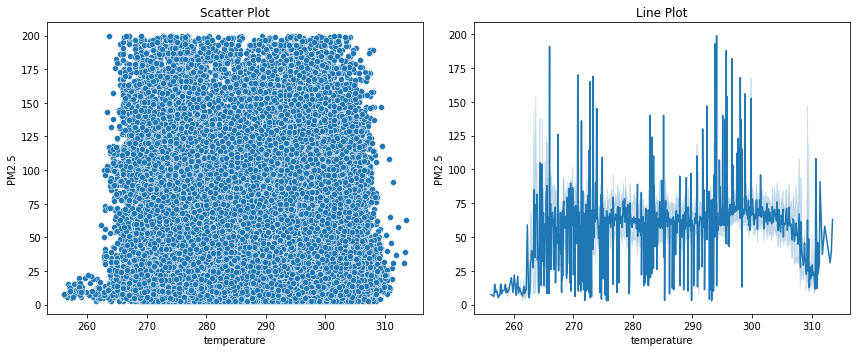

In [109]:
from matplotlib import rcParams


rcParams['figure.figsize'] = 12,5


plt.subplot(1,2,1)
sns.scatterplot(x="temperature", y="PM2.5",data=df4,sizes=(20, 20))
plt.title("Scatter Plot")

plt.subplot(1,2,2)
sns.lineplot(x="temperature", y="PM2.5",data=df4)
plt.title("Line Plot")
plt.tight_layout()



### At high temperature or less temperature the concentration of PM2.5 is very less or negligible but at normal temperature it is quite high.

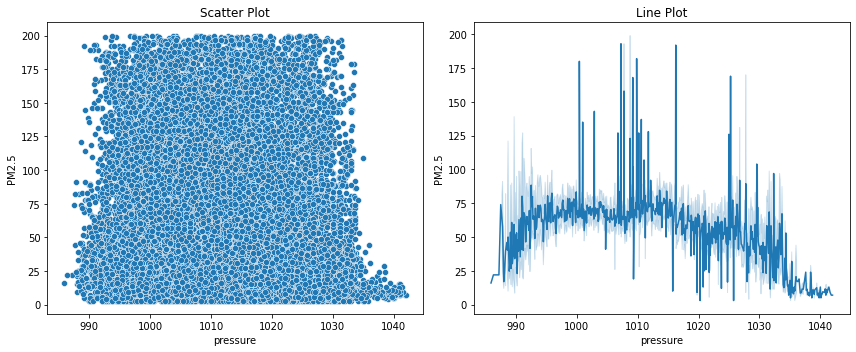

In [110]:
from matplotlib import rcParams


rcParams['figure.figsize'] = 12,5


plt.subplot(1,2,1)
sns.scatterplot(x="pressure", y="PM2.5",data=df4,sizes=(20, 20))
plt.title("Scatter Plot")

plt.subplot(1,2,2)
sns.lineplot(x="pressure", y="PM2.5",data=df4)
plt.title("Line Plot")
plt.tight_layout()



### At high pressure or less pressure the concentration of PM2.5 is very less or negligible but at normal pressure it is quite high.

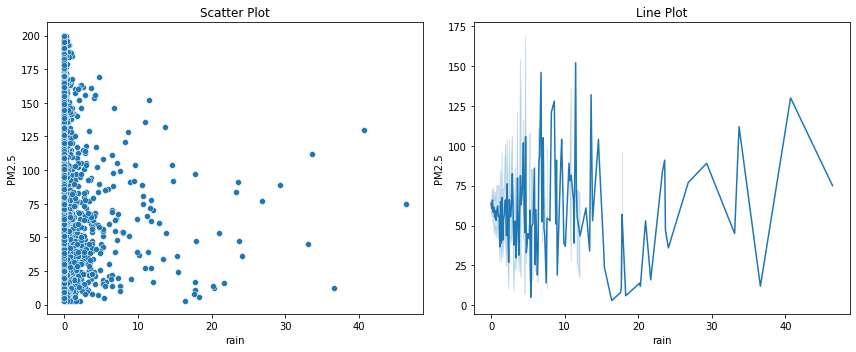

In [111]:
from matplotlib import rcParams


rcParams['figure.figsize'] = 12,5


plt.subplot(1,2,1)
sns.scatterplot(x="rain", y="PM2.5",data=df4,sizes=(20, 20))
plt.title("Scatter Plot")

plt.subplot(1,2,2)
sns.lineplot(x="rain", y="PM2.5",data=df4)
plt.title("Line Plot")
plt.tight_layout()



### As we dont have much data of high rainfall and most of the rainfall is near to 0 or 0 , no concrete conclusion can be drawn from this.

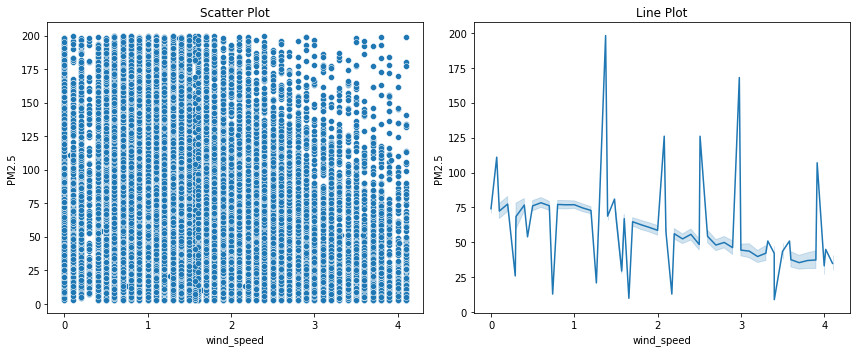

In [112]:
from matplotlib import rcParams


rcParams['figure.figsize'] = 12,5


plt.subplot(1,2,1)
sns.scatterplot(x="wind_speed", y="PM2.5",data=df4,sizes=(20, 20))
plt.title("Scatter Plot")

plt.subplot(1,2,2)
sns.lineplot(x="wind_speed", y="PM2.5",data=df4)
plt.title("Line Plot")
plt.tight_layout()



### With increase in wind speed concentration of PM2.5 decreases.

# Model training and evaluation.

As you already know that you have been provided with a dataset with attributes like PM2.5, wind speed etc, you may have already got an idea about what you have to do in the next task.

The dataset is of the weather condition of a particular place over some years, one hour at a time.

Your task is to predict the PM2.5 concentration on a test dataset.

The test dataset will be provided to you on Day 7.

Here are the tasks that you need to complete:-

1. Train atleast two models to predict PM2.5 and decide a the final model from the trained models for prediction.

2. For each model print it's accuracy(out of 100 in %)(r2 is preferred), the errors(mean squared, mean absolute etc).

3. Tell us why did you select a particular model for final prediction with stats/proofs to support your answer.

4. After finalising the model predict PM2.5 concentration on test dataset that you had made in test_train_split and plot a graph of actual vs predicted to show comparison and how accurately the model is predicting.
-Actual data is the values of PM2.5 in the test dataset that you have made.
-Predicted data is the values predicted by your finalized model.

5. Explain the observation that you can make from the actual vs predicted graph.

6. Predict output on 10 different inputs and print them. These inputs are your inputs that you will give to the model after the model is fully trained and ready for deployment. The inputs values depends on you. You can take any input values.

7. Optimize your model as much as possible for better accuracy keeping in mind the case of underfitting and overfitting.

In [113]:
df4

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,wind_direction
1,2013.0,3.0,1.0,2.0,7.0,271.9,1023.5,0.0,1.569268,6
2,2013.0,3.0,1.0,3.0,6.0,271.6,1024.5,0.0,3.100000,7
3,2013.0,3.0,1.0,4.0,3.0,271.0,1025.2,0.0,2.000000,3
4,2013.0,3.0,1.0,5.0,5.0,270.8,1025.6,0.0,3.700000,3
5,2013.0,3.0,1.0,6.0,3.0,270.4,1026.5,0.0,2.500000,5
...,...,...,...,...,...,...,...,...,...,...
31516,2017.0,2.0,27.0,6.0,80.0,272.7,1019.4,0.0,0.800000,1
31517,2017.0,2.0,27.0,16.0,75.0,288.9,1014.0,0.0,2.900000,12
31518,2017.0,2.0,27.0,19.0,51.0,284.5,1014.1,0.0,1.000000,11
31519,2017.0,2.0,28.0,2.0,9.0,281.6,1016.0,0.0,0.900000,5


In [114]:
df5=df4.copy()

df5=df5.drop(columns=["year","month","day","hour"])
df5

,PM2.5,temperature,pressure,rain,wind_speed,wind_direction
1,7.0,271.9,1023.5,0.0,1.569268,6
2,6.0,271.6,1024.5,0.0,3.100000,7
3,3.0,271.0,1025.2,0.0,2.000000,3
4,5.0,270.8,1025.6,0.0,3.700000,3
5,3.0,270.4,1026.5,0.0,2.500000,5
...,...,...,...,...,...,...
31516,80.0,272.7,1019.4,0.0,0.800000,1
31517,75.0,288.9,1014.0,0.0,2.900000,12
31518,51.0,284.5,1014.1,0.0,1.000000,11
31519,9.0,281.6,1016.0,0.0,0.900000,5


In [115]:
df5=df5.reindex(["wind_speed","wind_direction","pressure",'rain',"temperature",'PM2.5'],axis=1)
Y=df5['PM2.5']
Y
df5.drop(columns=["PM2.5"],inplace=True)
df5

,wind_speed,wind_direction,pressure,rain,temperature
1,1.569268,6,1023.5,0.0,271.9
2,3.100000,7,1024.5,0.0,271.6
3,2.000000,3,1025.2,0.0,271.0
4,3.700000,3,1025.6,0.0,270.8
5,2.500000,5,1026.5,0.0,270.4
...,...,...,...,...,...
31516,0.800000,1,1019.4,0.0,272.7
31517,2.900000,12,1014.0,0.0,288.9
31518,1.000000,11,1014.1,0.0,284.5
31519,0.900000,5,1016.0,0.0,281.6


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(df5, Y, test_size=0.2,random_state=0)

***PREPROCESSING USING POWER TRANSFROMER*** 

In [117]:
from sklearn.preprocessing import PowerTransformer

In [118]:
#PowerTransformer
sc2=PowerTransformer()
sc2.fit(X_train)
X_train2=sc2.transform(X_train)
X_test2=sc2.transform(X_test)


sc3=PowerTransformer()
sc3.fit(Y_train.values.reshape(-1,1))
Y_train2=sc3.transform(Y_train.values.reshape(-1,1))
Y_test2=sc3.transform(Y_test.values.reshape(-1,1))

## ***MODEL TRAINING STARTS***

# Extra Tree Regressor

In [119]:
from sklearn.ensemble import ExtraTreesRegressor

In [120]:
clf2=ExtraTreesRegressor(n_estimators=1000,max_depth=100,)

In [121]:
clf2.fit(X_train2, Y_train2)
r2_score_ExT=clf2.score(X_test2, Y_test2)
Y3_pred=clf2.predict(X_test2)

# Random Forest Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
regr1 = RandomForestRegressor(max_depth=13, random_state=42)

In [124]:
regr1.fit(X_train2, Y_train2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [125]:
from sklearn.metrics import r2_score

Y1_pred=regr1.predict(X_test2)
r2_score_RF=r2_score(Y_test2, Y1_pred,multioutput='variance_weighted')

# RandomForestRegressor Using RandomizedSearchCV

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [127]:
rf = RandomForestRegressor()
random_grid = {'bootstrap': [True, False],
               'max_depth': [10,15, 22, 21,30, 42, 55, 100,None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
rf_random = RandomizedSearchCV(scoring="neg_mean_squared_error",estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train2, Y_train2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [128]:
print(rf_random.best_params_)
print(rf_random.best_score_)
print(rf_random.best_estimator_)

{'n_estimators': 230, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}
-0.709951078211757
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=230, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [129]:
print(rf_random.cv_results_)

{'mean_fit_time': array([20.80123846,  8.09435693,  4.68279656,  5.33728711,  8.25604963,
        4.07188741,  9.63316194, 10.52984961,  6.52121361, 13.74225624,
       16.23882469, 11.96661798,  8.65561167,  4.31338159, 11.28160898,
        3.30108953, 10.22953018,  2.19813522,  4.71264982,  5.06139509,
        3.08807762,  3.56248665,  6.78242731,  6.42394956, 11.05187798,
        3.57464679,  6.42567293,  8.0857048 ,  7.76173417,  8.12111203,
        7.46387871, 11.74756511, 20.26130168,  3.15823968,  7.16953858,
        7.69035991,  6.3683726 ,  5.71242785, 21.45284883,  9.10769272,
        4.68295423,  5.48811467, 24.49908837,  6.96672765,  2.84348098,
        7.73194599,  7.31593863,  8.45082728,  2.18365765, 12.03230174,
       11.41339731,  3.82300742,  7.21780396,  3.16238252,  5.12266374,
       11.28214486, 15.82459641,  5.05261723, 19.47757951,  7.84997209,
        4.36506176, 10.92413799,  6.22188131,  9.19355877, 11.30529189,
       18.01835092, 10.28603029,  3.69077094, 

In [130]:
regr3 = RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=1300,random_state=35,bootstrap=True)
regr3.fit(X_train2, Y_train2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1300, n_jobs=None, oob_score=False,
                      random_state=35, verbose=0, warm_start=False)

In [131]:
from sklearn.metrics import r2_score

Y_pred=regr3.predict(X_test2)
r2_score_RCV=r2_score(Y_test2, Y_pred,multioutput='variance_weighted')

In [132]:
Y_pred=regr3.predict(X_test2)

## ***ACCURACY-***

In [133]:
print("Acuracy from ExtraTreesRegressor: ",r2_score_ExT*100,"%")
print("Acuracy from RandomForestRegressor: ",r2_score_RF*100,"%")
print("Acuracy from RandomTreesRegressor Using RandomizedSearchCV : ",r2_score_RCV*100,"%")

Acuracy from ExtraTreesRegressor:  24.20142549043235 %
Acuracy from RandomForestRegressor:  30.224967237916534 %
Acuracy from RandomTreesRegressor Using RandomizedSearchCV :  31.160430901017133 %


From above we conclude that we obatin best ***accuracy*** of ***31.160461979562058 % %*** from ***Random_Trees_Regressor Using Randomized_Search_CV***

## ***PRINTING OF MEAN ABSOLUTE AND MEAN SQAURED ERROR FOR EACH MODEL TRAINED ABOVE***

In [134]:
from sklearn import metrics
print("ExtraTreesRegressor")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test2, Y3_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test2, Y3_pred))

print("\n\n")

from sklearn import metrics
print("RandomForestRegressor")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test2, Y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test2, Y1_pred))

print("\n\n")

from sklearn import metrics
print("RandomTreesRegressor Using RandomizedSearchCV")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test2, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test2, Y_pred))

ExtraTreesRegressor
Mean Absolute Error: 0.7014940560309706
Mean Squared Error: 0.7837044743843504



RandomForestRegressor
Mean Absolute Error: 0.6832031117093657
Mean Squared Error: 0.7214252475032642



RandomTreesRegressor Using RandomizedSearchCV
Mean Absolute Error: 0.6819486288382607
Mean Squared Error: 0.7117532046826782


Tell us why did you select a particular model for final prediction with stats/proofs to support your answer.

The main reason was the accuracy which we obtained from this model was the best as compared to other models.
The reason why we obatined best accuracy was Randomized Search CV which gave us the hyper-parameters to tune the classifier that is Random Tree Regressor.

In [135]:
Y_pred_final=sc3.inverse_transform(Y_pred.reshape(-1, 1))
Y_pred_final

array([[65.37731181],
       [54.61773552],
       [27.57135435],
       ...,
       [45.25290129],
       [59.03621589],
       [49.30535442]])

In [136]:
Y_test_df=pd.DataFrame(Y_test)

Y_pred_final_df=pd.DataFrame(Y_pred_final)
Y_pred_final_df.columns=["PM2.5"]

In [137]:
k=Y_test_df.value_counts()

Y_test_df.index = [i for i in range(0, 5780)]
Y_test_df.columns=['PM2.5']

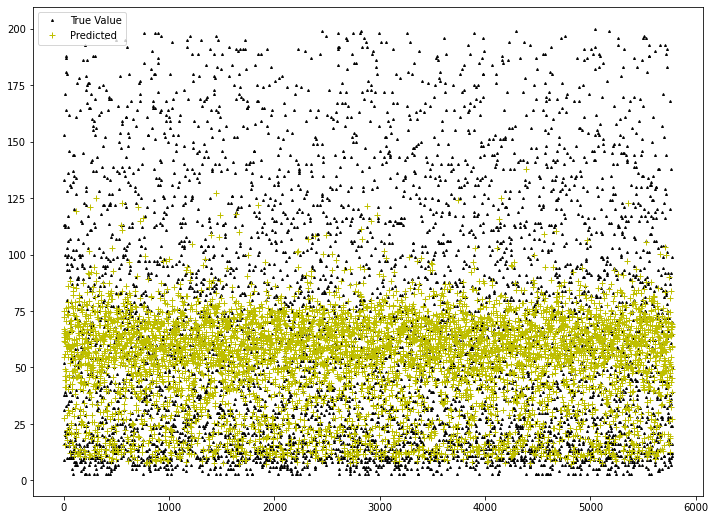

In [138]:
plt.figure(figsize=(12,9))

plt.plot(Y_test_df,'k^', markersize=2,label="True Value")
plt.plot(Y_pred_final_df,'y+',label="Predicted")
plt.legend()

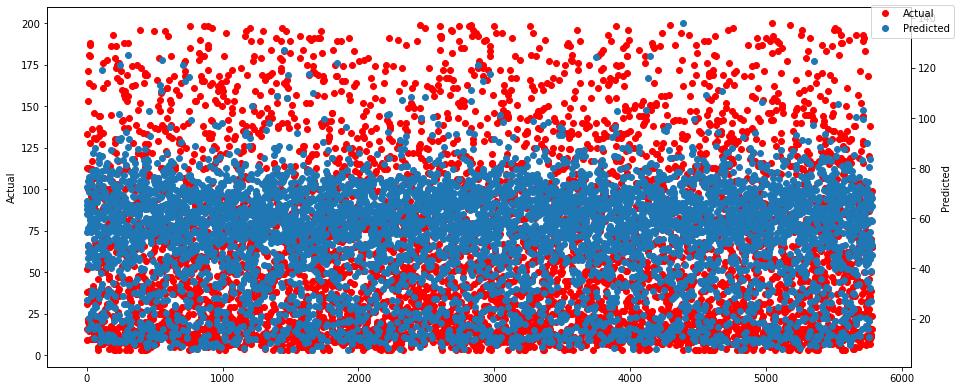

In [139]:
arr=np.arange(0,len(Y_pred_final_df))
arr=pd.DataFrame(arr)

arr.columns=["one"]

fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(arr["one"],Y_test_df['PM2.5'], 'ro')
a1.set_ylabel('Actual')
a2 = a1.twinx()
a2.plot(arr["one"],Y_pred_final_df["PM2.5"], 'o')
a2.set_ylabel('Predicted')
fig.legend(labels = ('Actual','Predicted'),loc='upper right')
plt.show()


Explain the observation that you can make from the actual vs predicted graph.


***We conclude that most of the predicted values are much less as compared to true values.
This may be due the fact that the model we used had a very low r2_score as the label "PM2.5" didnt correlate with the features.***

Predict output on 10 different inputs and print them. 
These inputs are your inputs that you will give to the model after the model is fully trained and ready for deployment. 
The inputs values depends on you.
You can take any input values

***Creating random data set***

In [140]:
arr1=[[0,271.6,1030.6,1.4,5],
[1,274.7,900.1,2.1,3],
[0,271.2,850.1,2,5],
[1,270.5,1019.6,0.7,7],
[0,300,1200.7,1.7,4],
[10,271,1019.4,1.2,4],
[2,260.9,1010.5,0.2,14],
[5,274.7,1040.9,1.6,13],
[1,285.2,950.2,3.1,11],
[1,300,1000,2.1,16]]
arr1=pd.DataFrame(arr1)
arr1.columns = ['b','c','d','e','f']
arr1=arr1.reindex(["e",'f','d','b','c',],axis=1)
arr1


,e,f,d,b,c
0,1.4,5,1030.6,0,271.6
1,2.1,3,900.1,1,274.7
2,2.0,5,850.1,0,271.2
3,0.7,7,1019.6,1,270.5
4,1.7,4,1200.7,0,300.0
5,1.2,4,1019.4,10,271.0
6,0.2,14,1010.5,2,260.9
7,1.6,13,1040.9,5,274.7
8,3.1,11,950.2,1,285.2
9,2.1,16,1000.0,1,300.0


***Scaling the random dataset***

In [141]:
arr1=sc2.transform(arr1)
arr1

array([[ -0.05688956,  -0.19860062,   1.85936358,  -0.21339091,
         -1.39088191],
       [  0.66709011,  -0.69307994, -14.63388006,   4.72279462,
         -1.1630486 ],
       [  0.57132672,  -0.19860062, -24.9522002 ,  -0.21339091,
         -1.41956746],
       [ -0.95167568,   0.21849107,   0.86081647,   4.72279462,
         -1.46938103],
       [  0.26967069,  -0.43342325,  12.06290819,  -0.21339091,
          1.0998263 ],
       [ -0.29111668,  -0.43342325,   0.84933892,   4.72279462,
         -1.43384995],
       [ -1.7695937 ,   1.36907836,   0.        ,   4.72279462,
         -2.10475669],
       [  0.16382474,   1.22436142,   2.74313516,   4.72279462,
         -1.1630486 ],
       [  1.5214267 ,   0.91855757,  -6.89800935,   4.72279462,
         -0.31512832],
       [  0.66709011,   1.64474752,  -1.04445732,   4.72279462,
          1.0998263 ]])

***Predicting Values***

In [142]:
y_pr=regr3.predict(arr1)
y_pr.shape

(10,)

In [143]:
y_pr=sc3.inverse_transform(y_pr.reshape(-1,1))
y_pr

array([[12.4668821 ],
       [51.57050591],
       [65.09929218],
       [73.16267323],
       [19.41299193],
       [67.610815  ],
       [60.9382427 ],
       [33.07361549],
       [53.9318786 ],
       [50.55472845]])

# CREATING PIPELINE

In [144]:
from sklearn.pipeline import make_pipeline

In [145]:
pipeline_rf=make_pipeline(PowerTransformer(),
                     RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=1300,random_state=35,bootstrap=True))

In [146]:
Y_train_2=sc3.transform(Y_train.values.reshape(-1,1))

***FITTING PIPELINE AND TRAINING IT***

In [147]:
pipeline_rf.fit(X_train, Y_train_2)

Pipeline(memory=None,
         steps=[('powertransformer',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=15,
                                       max_features='sqrt', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=4, min_samples_split=5,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1300, n_jobs=None,
                                       oob_score=False, random_state=35,
                                       verbose=0, warm_start=False))],
      

In [148]:
pipeline_rf.score(X_test, Y_test2)*100 

31.160430901017133

# ***LOADING TEST DATA SET***

In [150]:
df_test=pd.read_csv("test_dataset.csv")
df_test.isnull().sum()

year                 0
month                0
day                  0
hour                 0
temperature          9
pressure             9
rain                 9
wind_direction      38
wind_speed           4
PM2.5             2612
dtype: int64

In [151]:
df_test["temperature"]=df_test["temperature"]+273

In [152]:
df_test['temperature'].interpolate(method='linear', direction = 'both', inplace=True) 
df_test['pressure'].interpolate(method='linear', direction = 'both', inplace=True) 
df_test['rain'].interpolate(method='linear', direction = 'both', inplace=True) 
df_test["wind_speed"].fillna(df_test["wind_speed"].mean(),inplace=True)

In [153]:
index = df_test["wind_direction"]
index.value_counts()

NE     545
ENE    295
SW     242
NW     241
E      193
NNW    152
ESE    140
NNE    139
SE     128
N      110
WSW     91
S       73
SSW     67
SSE     62
W       51
WNW     45
Name: wind_direction, dtype: int64

In [154]:
df_test["wind_direction"]=df_test["wind_direction"].fillna("NE")

In [155]:
df_test.isnull().sum()

year                 0
month                0
day                  0
hour                 0
temperature          0
pressure             0
rain                 0
wind_direction       0
wind_speed           0
PM2.5             2612
dtype: int64

In [156]:
df_test

,year,month,day,hour,temperature,pressure,rain,wind_direction,wind_speed,PM2.5
0,2016,8,2,21,303.6,1005.2,0.0,S,1.3,NaN
1,2016,8,5,11,304.1,1006.2,0.0,ENE,2.2,NaN
2,2016,8,5,12,304.5,1005.9,0.0,ESE,2.2,NaN
3,2016,8,6,4,299.8,1002.9,0.0,SW,0.2,NaN
4,2016,8,6,10,303.8,1002.4,0.0,ENE,1.1,NaN
...,...,...,...,...,...,...,...,...,...,...
2607,2017,2,28,19,285.5,1013.5,0.0,NW,2.4,NaN
2608,2017,2,28,20,284.6,1013.6,0.0,WNW,0.9,NaN
2609,2017,2,28,21,283.8,1014.2,0.0,NW,1.1,NaN
2610,2017,2,28,22,283.5,1014.4,0.0,NNW,1.2,NaN


In [157]:
#USING LABEL ENCODER ON FOR CATEGORICAL DATASET
wind_dir=df_test["wind_direction"]
label=le.fit_transform(df_test["wind_direction"])
df_test["wind_direction"]=label

In [158]:
X=df_test.copy()

X=X.drop(columns=["year","month","day","hour","PM2.5"])
X=X.reindex(["wind_speed","wind_direction","pressure",'rain',"temperature"],axis=1)
X

,wind_speed,wind_direction,pressure,rain,temperature
0,1.3,8,1005.2,0.0,303.6
1,2.2,1,1006.2,0.0,304.1
2,2.2,2,1005.9,0.0,304.5
3,0.2,12,1002.9,0.0,299.8
4,1.1,1,1002.4,0.0,303.8
...,...,...,...,...,...
2607,2.4,7,1013.5,0.0,285.5
2608,0.9,14,1013.6,0.0,284.6
2609,1.1,7,1014.2,0.0,283.8
2610,1.2,6,1014.4,0.0,283.5


In [159]:
Y=pipeline_rf.predict(X)

In [160]:
Y=sc3.inverse_transform(Y.reshape(-1,1))
Y

array([[61.97333373],
       [29.05931433],
       [51.73018043],
       ...,
       [45.96118065],
       [46.42690357],
       [57.27070728]])

In [161]:
df_test["PM2.5"]=Y.astype("int")

In [162]:
df_test

,year,month,day,hour,temperature,pressure,rain,wind_direction,wind_speed,PM2.5
0,2016,8,2,21,303.6,1005.2,0.0,8,1.3,61
1,2016,8,5,11,304.1,1006.2,0.0,1,2.2,29
2,2016,8,5,12,304.5,1005.9,0.0,2,2.2,51
3,2016,8,6,4,299.8,1002.9,0.0,12,0.2,58
4,2016,8,6,10,303.8,1002.4,0.0,1,1.1,50
...,...,...,...,...,...,...,...,...,...,...
2607,2017,2,28,19,285.5,1013.5,0.0,7,2.4,17
2608,2017,2,28,20,284.6,1013.6,0.0,14,0.9,60
2609,2017,2,28,21,283.8,1014.2,0.0,7,1.1,45
2610,2017,2,28,22,283.5,1014.4,0.0,6,1.2,46


In [163]:
df_test["wind_direction"]=wind_dir

In [164]:
df_test["temperature"]=df_test["temperature"]-273

In [165]:
df_test

,year,month,day,hour,temperature,pressure,rain,wind_direction,wind_speed,PM2.5
0,2016,8,2,21,30.6,1005.2,0.0,S,1.3,61
1,2016,8,5,11,31.1,1006.2,0.0,ENE,2.2,29
2,2016,8,5,12,31.5,1005.9,0.0,ESE,2.2,51
3,2016,8,6,4,26.8,1002.9,0.0,SW,0.2,58
4,2016,8,6,10,30.8,1002.4,0.0,ENE,1.1,50
...,...,...,...,...,...,...,...,...,...,...
2607,2017,2,28,19,12.5,1013.5,0.0,NW,2.4,17
2608,2017,2,28,20,11.6,1013.6,0.0,WNW,0.9,60
2609,2017,2,28,21,10.8,1014.2,0.0,NW,1.1,45
2610,2017,2,28,22,10.5,1014.4,0.0,NNW,1.2,46


In [166]:
#SAVING OUR TEST DATASET
df_test.to_csv("file1.csv")